In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
#from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf

In [17]:
df = pd.read_csv("C:/Users/admin/Downloads/Obesity Classification.csv")
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [20]:
df.Label.unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [5]:
df=df.replace({'Gender':{"Male":0,"Female":1}})

In [6]:
X=df.drop(['Label','ID'],axis =1)
Y=df['Label']
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:

# Convert integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)


In [11]:
# Build the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=5))  # 5 features in the dataset
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=4, activation='softmax'))  # Softmax for multi-class classification


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
model.fit(x_train, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
3/3 [==============================] - 1s 77ms/step - loss: 1.4428 - accuracy: 0.1558 - val_loss: 1.4049 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 0s 14ms/step - loss: 1.3752 - accuracy: 0.2727 - val_loss: 1.3496 - val_accuracy: 0.4444
Epoch 3/20
3/3 [==============================] - 0s 12ms/step - loss: 1.3196 - accuracy: 0.3117 - val_loss: 1.2981 - val_accuracy: 0.4444
Epoch 4/20
3/3 [==============================] - 0s 13ms/step - loss: 1.2656 - accuracy: 0.4675 - val_loss: 1.2507 - val_accuracy: 0.4444
Epoch 5/20
3/3 [==============================] - 0s 12ms/step - loss: 1.2168 - accuracy: 0.5195 - val_loss: 1.2109 - val_accuracy: 0.4444
Epoch 6/20
3/3 [==============================] - 0s 13ms/step - loss: 1.1715 - accuracy: 0.5714 - val_loss: 1.1691 - val_accuracy: 0.4444
Epoch 7/20
3/3 [==============================] - 0s 12ms/step - loss: 1.1265 - accuracy: 0.5974 - val_loss: 1.1280 - val_accuracy: 0.5556
Epoch 8/20
3/3 [===========

In [14]:
loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

1/1 [==============================] - 0s 20ms/step - loss: 0.7084 - accuracy: 0.8182
Test Loss: 0.7084130644798279, Test Accuracy: 0.8181818127632141


In [15]:
history = model.fit(x_train, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
3/3 [==============================] - 0s 25ms/step - loss: 0.6807 - accuracy: 0.7662 - val_loss: 0.7350 - val_accuracy: 0.6667
Epoch 2/20
3/3 [==============================] - 0s 12ms/step - loss: 0.6591 - accuracy: 0.7662 - val_loss: 0.7145 - val_accuracy: 0.6667
Epoch 3/20
3/3 [==============================] - 0s 12ms/step - loss: 0.6384 - accuracy: 0.7792 - val_loss: 0.6967 - val_accuracy: 0.6667
Epoch 4/20
3/3 [==============================] - 0s 13ms/step - loss: 0.6189 - accuracy: 0.8182 - val_loss: 0.6804 - val_accuracy: 0.6667
Epoch 5/20
3/3 [==============================] - 0s 13ms/step - loss: 0.5998 - accuracy: 0.8442 - val_loss: 0.6622 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 0s 12ms/step - loss: 0.5822 - accuracy: 0.8571 - val_loss: 0.6438 - val_accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 0s 13ms/step - loss: 0.5632 - accuracy: 0.8831 - val_loss: 0.6278 - val_accuracy: 0.6667
Epoch 8/20
3/3 [===========

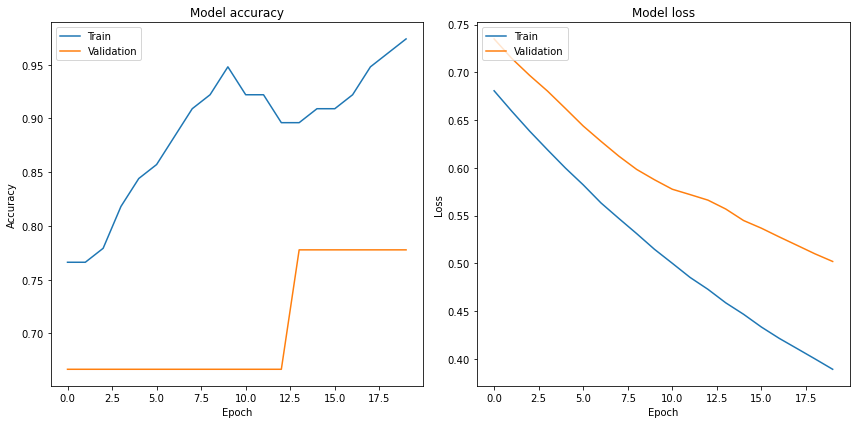

1/1 [==============================] - 0s 18ms/step - loss: 0.4411 - accuracy: 0.9545
Test Loss: 0.4411481022834778, Test Accuracy: 0.9545454382896423
1/1 [==============================] - 0s 14ms/step


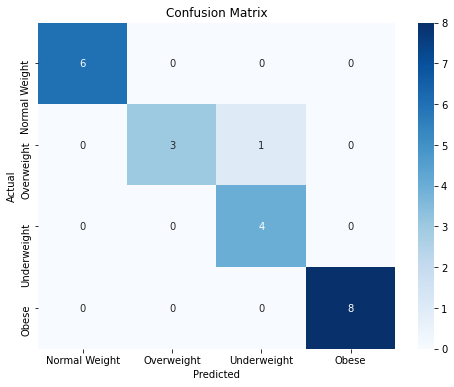

In [22]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Make predictions on the test set
y_pred_one_hot = model.predict(x_test)

# Convert predictions back to class labels
y_pred = np.argmax(y_pred_one_hot, axis=1)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
target_names = ['Normal Weight', 'Overweight', 'Underweight', 'Obese']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',xticklabels=target_names, 
          yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
#l1 regularization

from tensorflow.keras.regularizers import l1

# Build the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=5, kernel_regularizer=l1(0.01)))  # Add L1 regularization
model.add(Dense(units=32, activation='relu', kernel_regularizer=l1(0.001)))  # Add L1 regularization
model.add(Dense(units=4, activation='softmax'))  # Softmax for multi-class classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
3/3 [==============================] - 1s 67ms/step - loss: 2.2214 - accuracy: 0.1818 - val_loss: 2.0097 - val_accuracy: 0.4444
Epoch 2/20
3/3 [==============================] - 0s 14ms/step - loss: 2.1388 - accuracy: 0.3117 - val_loss: 1.9579 - val_accuracy: 0.5556
Epoch 3/20
3/3 [==============================] - 0s 13ms/step - loss: 2.0681 - accuracy: 0.4026 - val_loss: 1.9154 - val_accuracy: 0.7778
Epoch 4/20
3/3 [==============================] - 0s 12ms/step - loss: 1.9972 - accuracy: 0.4935 - val_loss: 1.8722 - val_accuracy: 0.7778
Epoch 5/20
3/3 [==============================] - 0s 12ms/step - loss: 1.9372 - accuracy: 0.5325 - val_loss: 1.8327 - val_accuracy: 0.7778
Epoch 6/20
3/3 [==============================] - 0s 13ms/step - loss: 1.8804 - accuracy: 0.5844 - val_loss: 1.7984 - val_accuracy: 0.7778
Epoch 7/20
3/3 [==============================] - 0s 12ms/step - loss: 1.8283 - accuracy: 0.6364 - val_loss: 1.7662 - val_accuracy: 0.7778
Epoch 8/20
3/3 [===========

In [28]:
loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

1/1 [==============================] - 0s 20ms/step - loss: 1.4054 - accuracy: 0.8182
Test Loss: 1.405373454093933, Test Accuracy: 0.8181818127632141


In [29]:
history = model.fit(x_train, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
3/3 [==============================] - 0s 24ms/step - loss: 1.3631 - accuracy: 0.7662 - val_loss: 1.4388 - val_accuracy: 0.6667
Epoch 2/20
3/3 [==============================] - 0s 12ms/step - loss: 1.3409 - accuracy: 0.7662 - val_loss: 1.4250 - val_accuracy: 0.6667
Epoch 3/20
3/3 [==============================] - 0s 12ms/step - loss: 1.3210 - accuracy: 0.7662 - val_loss: 1.4116 - val_accuracy: 0.6667
Epoch 4/20
3/3 [==============================] - 0s 12ms/step - loss: 1.3026 - accuracy: 0.7662 - val_loss: 1.3978 - val_accuracy: 0.6667
Epoch 5/20
3/3 [==============================] - 0s 12ms/step - loss: 1.2840 - accuracy: 0.7922 - val_loss: 1.3815 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 0s 13ms/step - loss: 1.2669 - accuracy: 0.8182 - val_loss: 1.3678 - val_accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 0s 12ms/step - loss: 1.2497 - accuracy: 0.8182 - val_loss: 1.3523 - val_accuracy: 0.7778
Epoch 8/20
3/3 [===========

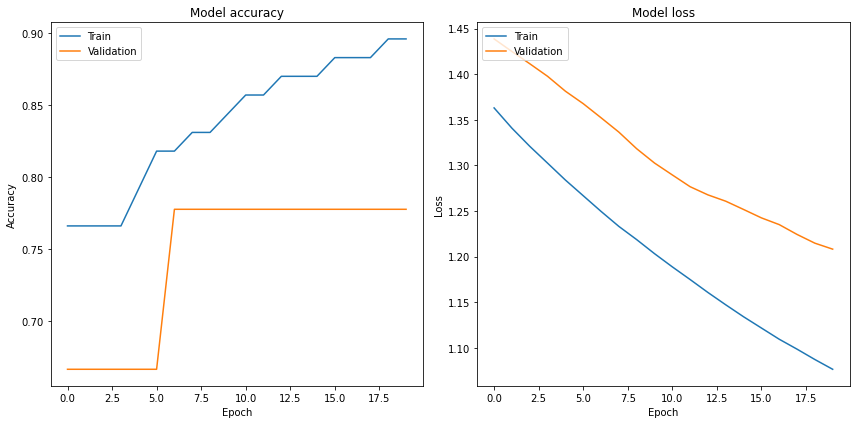

1/1 [==============================] - 0s 18ms/step - loss: 1.1177 - accuracy: 0.8636
Test Loss: 1.1176522970199585, Test Accuracy: 0.8636363744735718
1/1 [==============================] - 0s 40ms/step


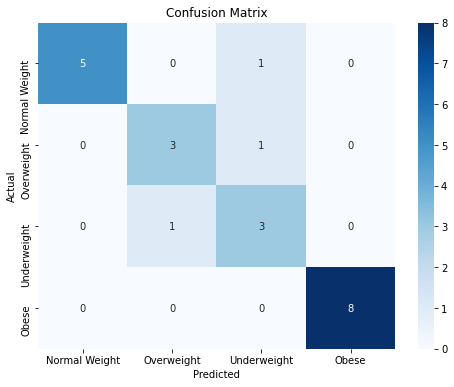

In [30]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Make predictions on the test set
y_pred_one_hot = model.predict(x_test)

# Convert predictions back to class labels
y_pred = np.argmax(y_pred_one_hot, axis=1)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
target_names = ['Normal Weight', 'Overweight', 'Underweight', 'Obese']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',xticklabels=target_names, 
          yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Epoch 1/100
3/3 [==============================] - 1s 63ms/step - loss: 1.3593 - accuracy: 0.3247 - val_loss: 1.3088 - val_accuracy: 0.5556
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 1.3102 - accuracy: 0.4286 - val_loss: 1.2809 - val_accuracy: 0.5556
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 1.2668 - accuracy: 0.5844 - val_loss: 1.2581 - val_accuracy: 0.6667
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 1.2274 - accuracy: 0.7532 - val_loss: 1.2354 - val_accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 1.1895 - accuracy: 0.7532 - val_loss: 1.2115 - val_accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 1.1501 - accuracy: 0.7532 - val_loss: 1.1867 - val_accuracy: 0.6667
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 1.1135 - accuracy: 0.7792 - val_loss: 1.1602 - val_accuracy: 0.6667
Epoch 8/100
3/3 [===

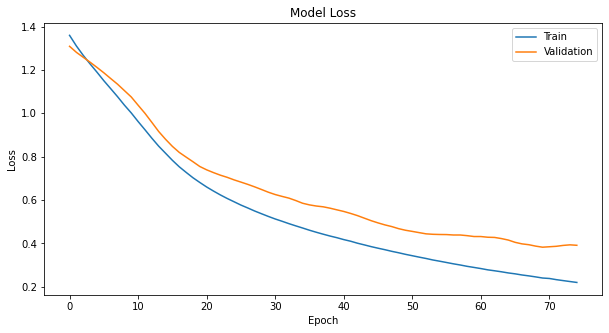

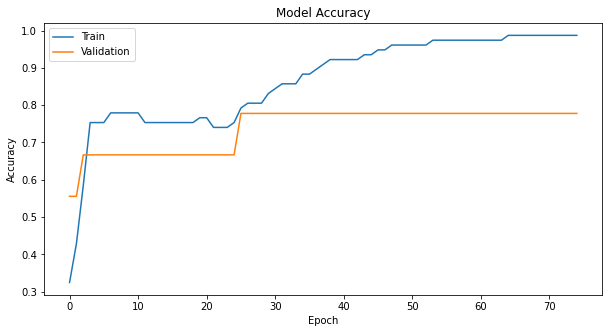

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping



# Build the neural network model
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_dim=5))


# Hidden layer
model.add(Dense(units=32, activation='relu'))


# Output layer
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train_one_hot, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(x_test,y_test_one_hot)
print("Accuracy:", accuracy)

# Plotting
import matplotlib.pyplot as plt

# Plot loss during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot accuracy during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess your data
# Assuming X_train, X_test, y_train, y_test are already defined

# Convert target data to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Regularization methods
regularization_methods = ['No Regularization', 'L1 Regularization', 'L2 Regularization', 'Dropout', 'Batch Normalization']
histories = []

# Train and evaluate models for each regularization method
for method in regularization_methods:
    print(f"Training model with {method}...")
    
    # Create model for the current regularization method
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=5))  # 5 features in the dataset
    
    if method == 'L1 Regularization':
        model.add(Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
    elif method == 'L2 Regularization':
        model.add(Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    elif method == 'Dropout':
        model.add(Dropout(0.2))
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.2))
    elif method == 'Batch Normalization':
        model.add(BatchNormalization())
        model.add(Dense(units=32, activation='relu'))
        model.add(BatchNormalization())
    else:
        model.add(Dense(units=32, activation='relu'))
    
    model.add(Dense(units=4, activation='softmax'))  # Softmax for multi-class classification
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(x_train, y_train_encoded, epochs=80, batch_size=32, validation_data=(x_test, y_test_encoded), callbacks=[early_stopping])
    
    # Append the training history to the list
    histories.append(history)



Training model with No Regularization...
Epoch 1/80
3/3 [==============================] - 1s 63ms/step - loss: 1.4953 - accuracy: 0.1628 - val_loss: 1.4416 - val_accuracy: 0.0909
Epoch 2/80
3/3 [==============================] - 0s 13ms/step - loss: 1.4195 - accuracy: 0.1744 - val_loss: 1.3883 - val_accuracy: 0.1364
Epoch 3/80
3/3 [==============================] - 0s 12ms/step - loss: 1.3600 - accuracy: 0.2093 - val_loss: 1.3367 - val_accuracy: 0.1818
Epoch 4/80
3/3 [==============================] - 0s 13ms/step - loss: 1.3023 - accuracy: 0.3953 - val_loss: 1.2884 - val_accuracy: 0.5455
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 1.2502 - accuracy: 0.5116 - val_loss: 1.2425 - val_accuracy: 0.5455
Epoch 6/80
3/3 [==============================] - 0s 12ms/step - loss: 1.1982 - accuracy: 0.6395 - val_loss: 1.1974 - val_accuracy: 0.5000
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 1.1522 - accuracy: 0.6512 - val_loss: 1.1564 - val_acc

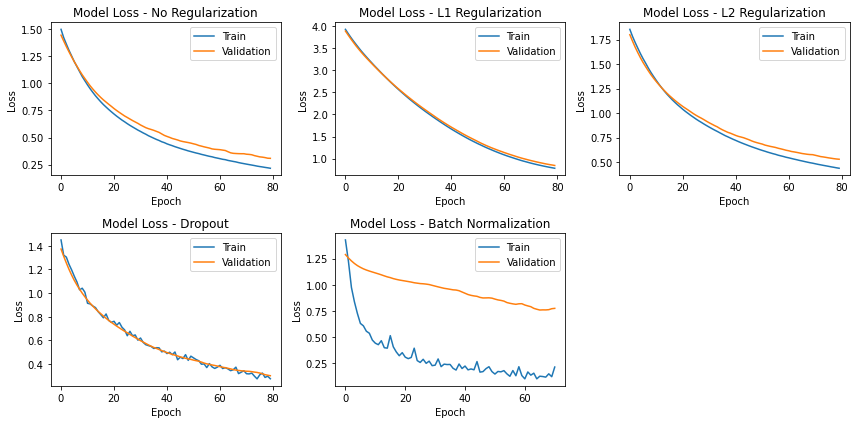

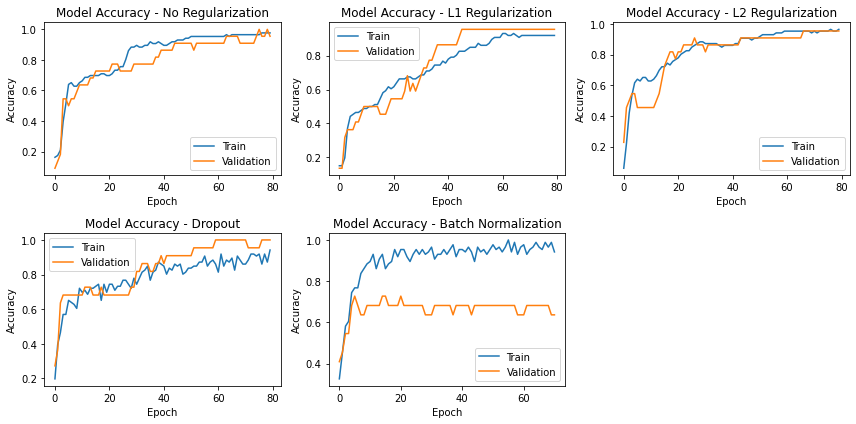

In [46]:
# Plotting
plt.figure(figsize=(12, 6))

for i, history in enumerate(histories):
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'Model Loss - {regularization_methods[i]}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

for i, history in enumerate(histories):
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Model Accuracy - {regularization_methods[i]}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

plt.tight_layout()
plt.show()